In [1]:
import cv2
import os
import functions
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seg_and_classify
from sklearn.linear_model import LinearRegression

In [2]:
path = 'Bananas time dataset'
#path = 'bananas_time_dataset_nuno'
imagens_time = []
for folder_path, folders, files in os.walk(path):
    print(files)

imagens_time = []
for i in range(len(files)):
    imagens_time.append(path+"/"+str(files[i]))

print(imagens_time)

['t0_0 (1).jpg', 't0_0 (2).jpg', 't0_0 (3).jpg', 't0_0 (4).jpg', 't0_0 (5).jpg', 't0_0 (6).jpg', 't0_0 (7).jpg', 't0_124 (1).jpg', 't0_124 (2).jpg', 't0_124 (3).jpg', 't0_146 (1).jpg', 't0_146 (2).jpg', 't0_146 (3).jpg', 't0_146 (4).jpg', 't0_24 (1).jpg', 't0_24 (2).jpg', 't0_24 (3).jpg', 't0_24 (4).jpg', 't0_24 (5).jpg', 't0_24 (6).jpg', 't0_48 (1).jpg', 't0_48 (2).jpg', 't0_48 (3).jpg', 't0_48 (4).jpg', 't0_48 (5).jpg', 't0_70 (1).jpg', 't0_70 (2).jpg', 't0_70 (3).jpg', 't0_70 (4).jpg', 't0_97 (1).jpg', 't0_97 (2).jpg', 't0_97 (3).jpg', 't0_97 (4).jpg', 't1_0 (1).jpg', 't1_0 (2).jpg', 't1_0 (3).jpg', 't1_0 (4).jpg', 't1_124 (1).jpg', 't1_124 (2).jpg', 't1_124 (3).jpg', 't1_146 (1).jpg', 't1_146 (2).jpg', 't1_146 (3).jpg', 't1_146 (4).jpg', 't1_24 (1).jpg', 't1_24 (2).jpg', 't1_24 (3).jpg', 't1_24 (4).jpg', 't1_48 (1).jpg', 't1_48 (2).jpg', 't1_48 (3).jpg', 't1_48 (4).jpg', 't1_70 (1).jpg', 't1_70 (2).jpg', 't1_70 (3).jpg', 't1_97 (1).jpg', 't1_97 (2).jpg', 't1_97 (3).jpg', 't2_0 (1).

In [3]:
def get_hours(files):
    hours = np.zeros(len(files))
    for i in range(len(files)):
        res1 = files[i].split('_')[1]
        hours[i] = int(res1.split(' ')[0])
        #print(files[i], res2)
    return hours

In [4]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

In [5]:
def time_analysis(files, start_index, end_index):
    size = end_index - start_index
    outputs = np.zeros(size)

    for i in range(size):
        outputs[i]=seg_and_classify.seg_n_class(plt.imread(imagens_time[i]))
        print((i+1)/size * 100, "%")
    hh = get_hours(files[start_index:end_index])

    reg = LinearRegression().fit(hh.reshape(-1, 1), outputs.reshape(-1, 1))

    print("Regression parameters: b=", reg.intercept_, " m=", reg.coef_, reg.score(hh.reshape(-1, 1), outputs.reshape(-1, 1)))

    plot_regression_line(hh.reshape(-1, 1), outputs.reshape(-1, 1), [reg.intercept_, reg.coef_])

In [6]:
def get_indexes(files):
    bananas = []
    for i in range(len(files)):
        bananas.append(files[i].split('_')[0])
    keys = list(Counter(bananas).keys())
    values = list(Counter(bananas).values())
    end_index=np.cumsum(np.array(values))
    start_index=np.zeros(end_index.shape[0])
    for i in range(1, end_index.shape[0], 1):
        start_index[i]=end_index[i-1]
    return keys, start_index.astype(int), end_index.astype(int)

In [7]:
keys, start_index, end_index = get_indexes(files)
print(keys, start_index, end_index)

['t0', 't1', 't2', 't3', 't4', 't5', 't6'] [  0  33  58  83 105 132 159] [ 33  58  83 105 132 159 191]



0: 640x480 1 banana, 2677.2ms
Speed: 8.4ms preprocess, 2677.2ms inference, 18.0ms postprocess per image at shape (1, 3, 640, 640)


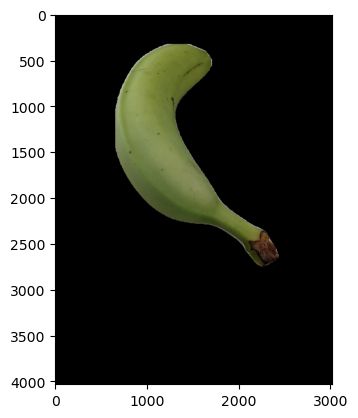

1/1 [==============================] - 0s 186ms/step
[    0.99998  1.5258e-07  7.9014e-07  1.9966e-05]
6.163017668825432e-05
3.0303030303030303 %



0: 640x480 1 person, 1 banana, 1 chair, 1 dining table, 3116.9ms
Speed: 8.1ms preprocess, 3116.9ms inference, 23.2ms postprocess per image at shape (1, 3, 640, 640)


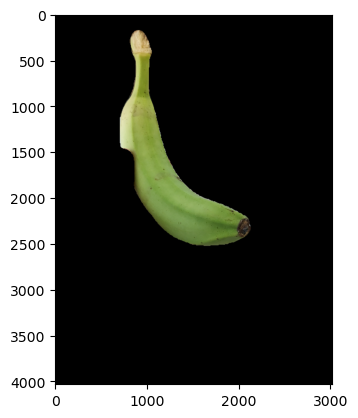

1/1 [==============================] - 0s 33ms/step
[    0.99924  8.0212e-05  0.00066818  8.0783e-06]
0.001440810292479
6.0606060606060606 %



0: 480x640 1 person, 1 bowl, 1 banana, 2969.8ms
Speed: 9.0ms preprocess, 2969.8ms inference, 12.4ms postprocess per image at shape (1, 3, 640, 640)


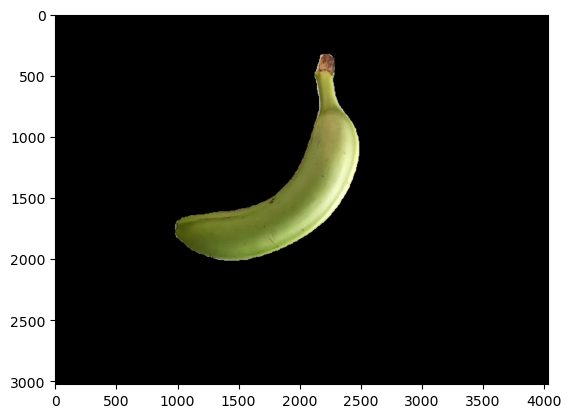

1/1 [==============================] - 0s 40ms/step
[     0.9965  0.00017214   0.0033263  1.0273e-06]
0.00682787379309957
9.090909090909092 %



0: 480x640 1 knife, 1 banana, 2805.0ms
Speed: 6.0ms preprocess, 2805.0ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 640)


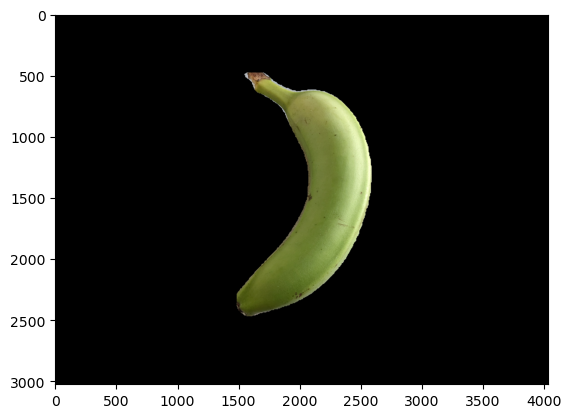

1/1 [==============================] - 0s 46ms/step
[    0.99995  6.5817e-08  4.9163e-05   2.322e-08]
9.846105869470989e-05
12.121212121212121 %



0: 640x480 1 banana, 1 chair, 1 dining table, 2929.5ms
Speed: 7.8ms preprocess, 2929.5ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)


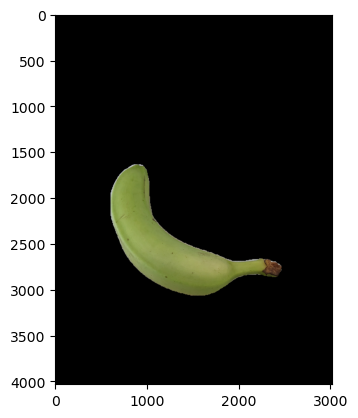

1/1 [==============================] - 0s 35ms/step
[    0.99045  9.9678e-06   0.0095215  1.3614e-05]
0.01909382838948659
15.151515151515152 %



0: 480x640 1 person, 1 bowl, 1 banana, 1 dining table, 1 cell phone, 1 microwave, 2843.7ms
Speed: 5.0ms preprocess, 2843.7ms inference, 19.8ms postprocess per image at shape (1, 3, 640, 640)


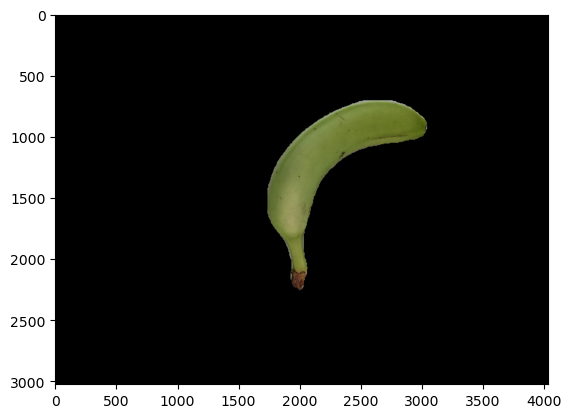

1/1 [==============================] - 0s 40ms/step
[   0.030696    0.026703     0.93951   0.0030869]
1.9149927673861384
18.181818181818183 %



0: 480x640 1 person, 1 bowl, 1 banana, 1 cell phone, 1 microwave, 2847.5ms
Speed: 5.0ms preprocess, 2847.5ms inference, 24.4ms postprocess per image at shape (1, 3, 640, 640)


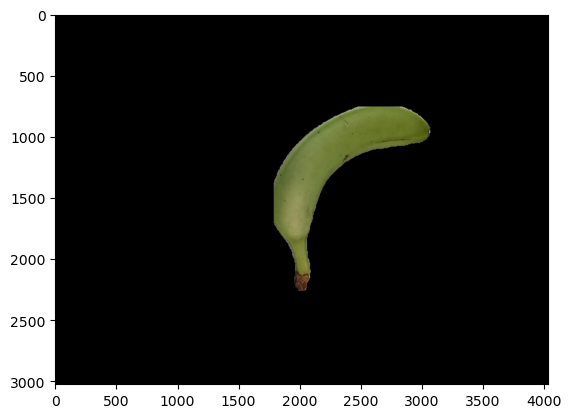

1/1 [==============================] - 0s 44ms/step
[   0.038412    0.030746     0.92905    0.001795]
1.894225260708481
21.21212121212121 %



0: 480x640 1 banana, 2981.0ms
Speed: 7.0ms preprocess, 2981.0ms inference, 32.2ms postprocess per image at shape (1, 3, 640, 640)


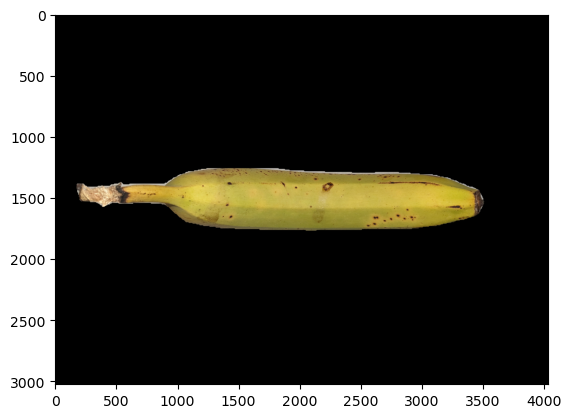

1/1 [==============================] - 0s 28ms/step
[ 0.00039835     0.99261   0.0062957  0.00070089]
1.0072991119814105
24.242424242424242 %



0: 480x640 1 knife, 1 banana, 3028.2ms
Speed: 32.9ms preprocess, 3028.2ms inference, 17.2ms postprocess per image at shape (1, 3, 640, 640)


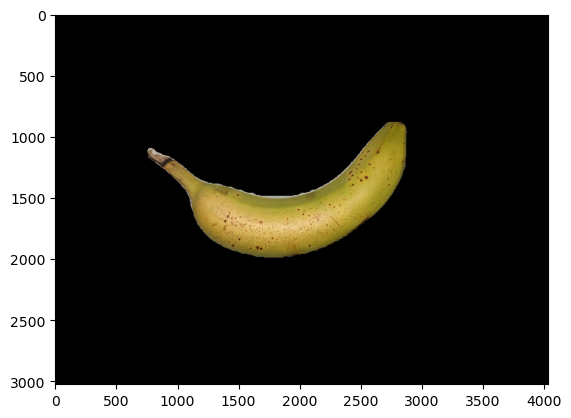

1/1 [==============================] - 0s 35ms/step
[ 0.00013742    0.063575     0.93616  0.00012633]
1.936276164764422
27.27272727272727 %



0: 480x640 1 banana, 2660.7ms
Speed: 8.0ms preprocess, 2660.7ms inference, 19.3ms postprocess per image at shape (1, 3, 640, 640)


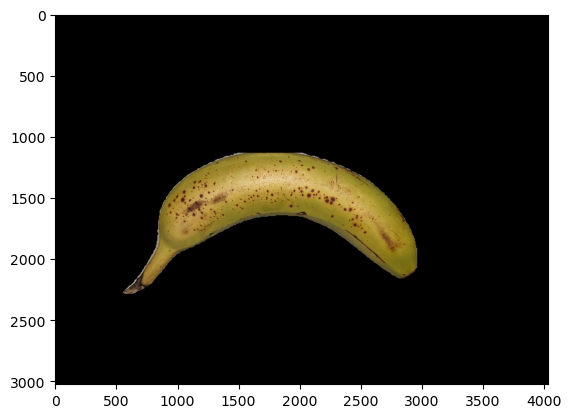

1/1 [==============================] - 0s 31ms/step
[ 2.4495e-05     0.35536     0.64458  3.5082e-05]
1.6446302389122138
30.303030303030305 %



0: 640x480 1 banana, 3123.8ms
Speed: 5.9ms preprocess, 3123.8ms inference, 23.5ms postprocess per image at shape (1, 3, 640, 640)


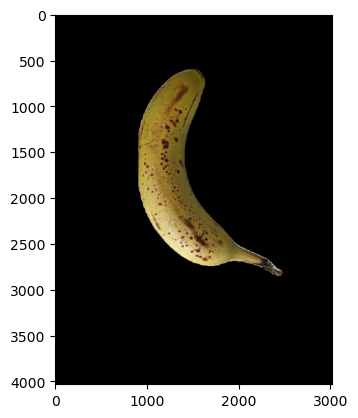

1/1 [==============================] - 0s 34ms/step
[ 7.7839e-06   0.0028234     0.99716  6.7766e-06]
1.9971679089803729
33.33333333333333 %



0: 640x480 1 kite, 1 banana, 2930.8ms
Speed: 6.9ms preprocess, 2930.8ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


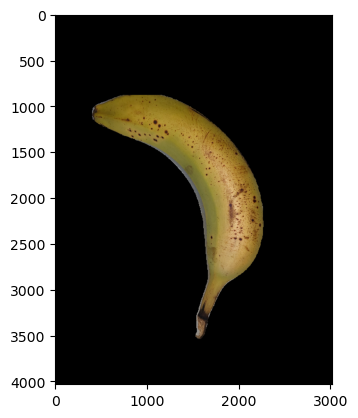

1/1 [==============================] - 0s 30ms/step
[ 7.6058e-06     0.99631   0.0032927  0.00039193]
1.0040690255118534
36.36363636363637 %



0: 640x480 1 banana, 2770.4ms
Speed: 5.1ms preprocess, 2770.4ms inference, 24.0ms postprocess per image at shape (1, 3, 640, 640)


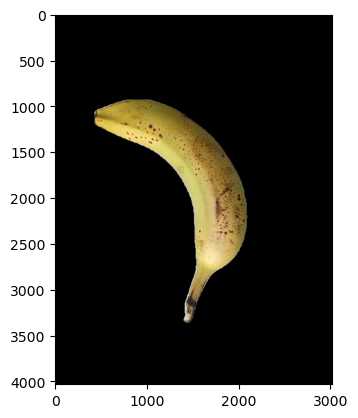

1/1 [==============================] - 0s 34ms/step
[ 0.00021187     0.35948       0.639   0.0013075]
1.641399419750087
39.39393939393939 %



0: 640x480 1 banana, 2832.6ms
Speed: 6.0ms preprocess, 2832.6ms inference, 22.8ms postprocess per image at shape (1, 3, 640, 640)


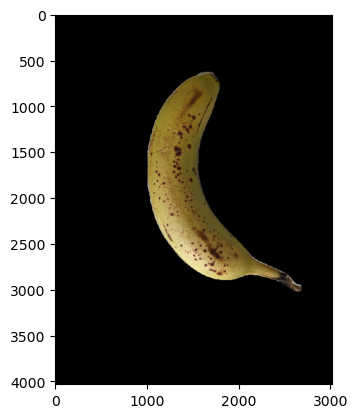

1/1 [==============================] - 0s 31ms/step
[ 6.5845e-05    0.063345     0.93645  0.00014258]
1.9366661661915714
42.42424242424242 %



0: 640x480 1 banana, 2806.3ms
Speed: 5.9ms preprocess, 2806.3ms inference, 25.0ms postprocess per image at shape (1, 3, 640, 640)


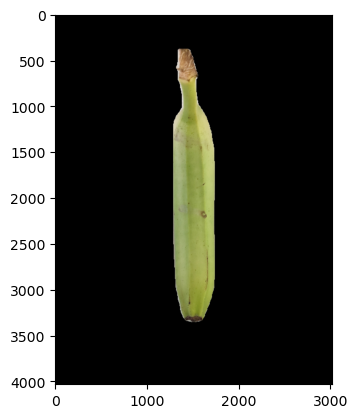

1/1 [==============================] - 0s 33ms/step
[    0.99995  3.0976e-06  4.4962e-05  5.3086e-07]
9.461391914555861e-05
45.45454545454545 %



0: 640x480 1 banana, 3020.0ms
Speed: 5.0ms preprocess, 3020.0ms inference, 31.9ms postprocess per image at shape (1, 3, 640, 640)


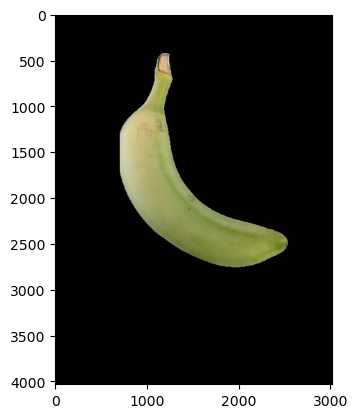

1/1 [==============================] - 0s 33ms/step
[    0.99983  3.1658e-09  0.00017438  6.3464e-09]
0.0003487761993457017
48.484848484848484 %



0: 480x640 1 knife, 1 banana, 2861.0ms
Speed: 4.1ms preprocess, 2861.0ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 640)


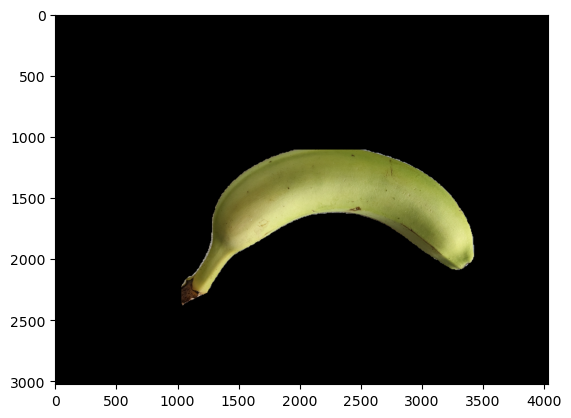

1/1 [==============================] - 0s 32ms/step
[    0.99859  3.5677e-05    0.001378  1.2193e-06]
0.002795296888507437
51.515151515151516 %



0: 640x480 1 banana, 3167.5ms
Speed: 5.0ms preprocess, 3167.5ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 640)


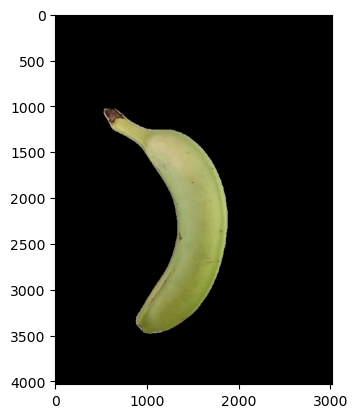

1/1 [==============================] - 0s 41ms/step
[          1  1.3464e-06  9.7992e-09  8.4569e-09]
1.3913855774205786e-06
54.54545454545454 %



0: 480x640 1 knife, 1 banana, 3004.6ms
Speed: 5.0ms preprocess, 3004.6ms inference, 16.2ms postprocess per image at shape (1, 3, 640, 640)


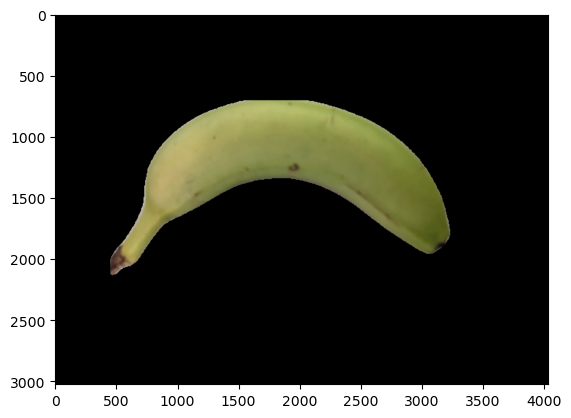

1/1 [==============================] - 0s 34ms/step
[    0.99954  1.9136e-05  0.00027761  0.00015947]
0.001052759002050152
57.57575757575758 %



0: 480x640 1 knife, 1 banana, 2740.4ms
Speed: 5.0ms preprocess, 2740.4ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


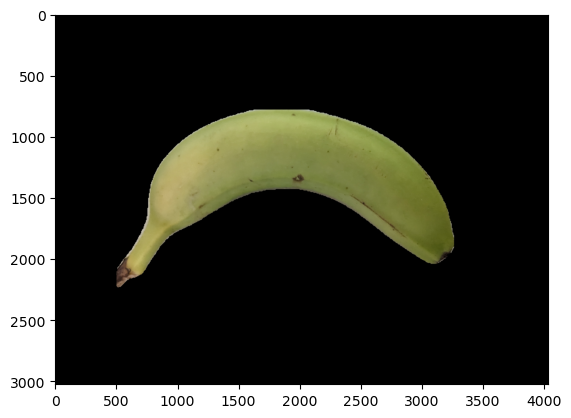

1/1 [==============================] - 0s 34ms/step
[    0.99998  2.2488e-06  1.6486e-06  1.2228e-05]
4.223052087581891e-05
60.60606060606061 %



0: 640x480 1 banana, 3068.7ms
Speed: 6.5ms preprocess, 3068.7ms inference, 23.0ms postprocess per image at shape (1, 3, 640, 640)


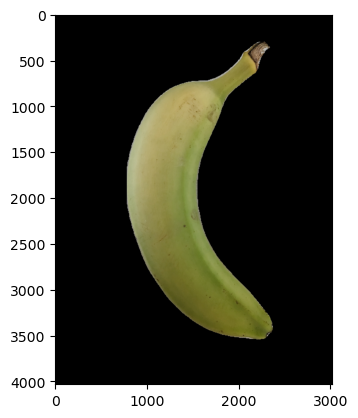

1/1 [==============================] - 0s 40ms/step
[    0.99998  3.6965e-08  4.7447e-07  1.4802e-05]
4.53924078804846e-05
63.63636363636363 %



0: 640x480 1 banana, 3100.7ms
Speed: 5.0ms preprocess, 3100.7ms inference, 23.5ms postprocess per image at shape (1, 3, 640, 640)


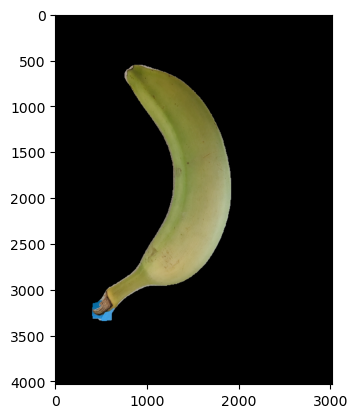

1/1 [==============================] - 0s 59ms/step
[          1  5.3223e-08  5.1884e-07  1.5426e-10]
1.0913669588191732e-06
66.66666666666666 %



0: 640x480 1 banana, 2979.7ms
Speed: 8.0ms preprocess, 2979.7ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 640)


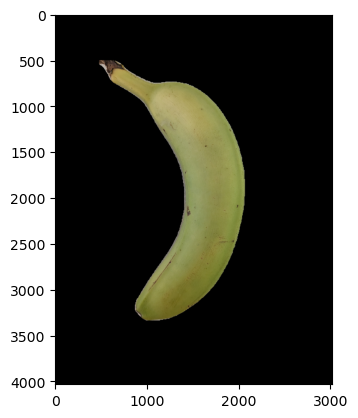

1/1 [==============================] - 0s 36ms/step
[          1  3.9985e-07  9.7091e-07  4.8728e-07]
3.8035125555779814e-06
69.6969696969697 %



0: 480x640 1 banana, 3122.3ms
Speed: 5.0ms preprocess, 3122.3ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 640)


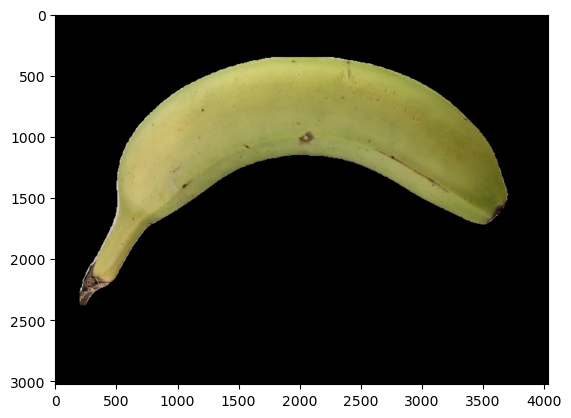

1/1 [==============================] - 0s 34ms/step
[    0.05352   0.0038483   0.0020029     0.94063]
2.829739739652723
72.72727272727273 %



0: 480x640 1 banana, 2734.8ms
Speed: 4.0ms preprocess, 2734.8ms inference, 31.4ms postprocess per image at shape (1, 3, 640, 640)


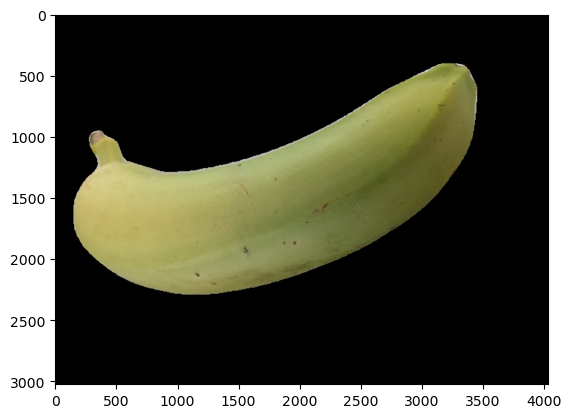

1/1 [==============================] - 0s 30ms/step
[          1  2.4969e-12  6.3006e-15  7.3016e-08]
2.1905062784081138e-07
75.75757575757575 %



0: 480x640 1 knife, 1 banana, 2735.9ms
Speed: 4.0ms preprocess, 2735.9ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 640)


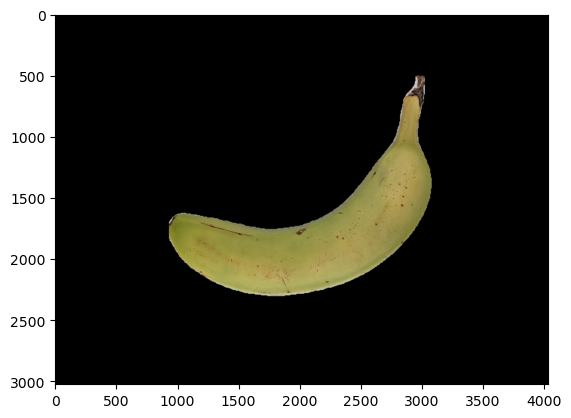

1/1 [==============================] - 0s 29ms/step
[    0.42936     0.37609     0.12097    0.073575]
0.8387596681714058
78.78787878787878 %



0: 640x480 1 spoon, 1 banana, 2740.5ms
Speed: 5.0ms preprocess, 2740.5ms inference, 13.0ms postprocess per image at shape (1, 3, 640, 640)


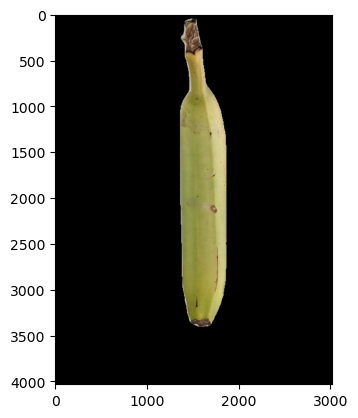

1/1 [==============================] - 0s 32ms/step
[    0.99529  0.00037397   0.0040274  0.00031263]
0.0093666247848887
81.81818181818183 %



0: 480x640 1 knife, 1 bowl, 1 banana, 3011.9ms
Speed: 5.0ms preprocess, 3011.9ms inference, 27.0ms postprocess per image at shape (1, 3, 640, 640)


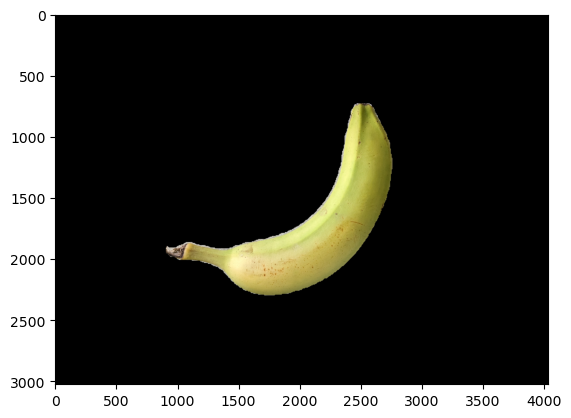

1/1 [==============================] - 0s 31ms/step
[    0.69139    0.084848      0.2232  0.00056037]
0.5329297344433144
84.84848484848484 %



0: 480x640 1 knife, 1 bowl, 1 banana, 3385.5ms
Speed: 10.0ms preprocess, 3385.5ms inference, 20.0ms postprocess per image at shape (1, 3, 640, 640)


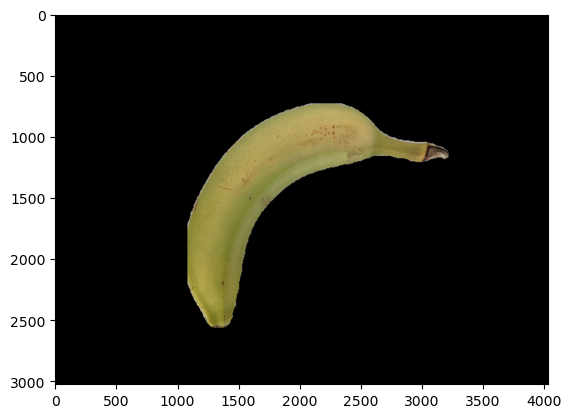

1/1 [==============================] - 0s 46ms/step
[   0.094234     0.46977     0.39356    0.042431]
1.3841879703104496
87.87878787878788 %



0: 480x640 1 banana, 3029.7ms
Speed: 8.0ms preprocess, 3029.7ms inference, 16.9ms postprocess per image at shape (1, 3, 640, 640)


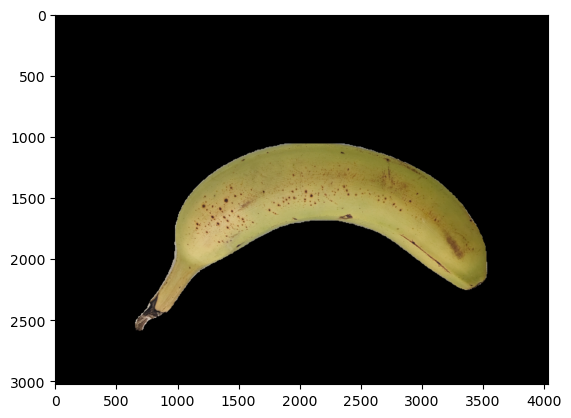

1/1 [==============================] - 0s 36ms/step
[   0.003839     0.96757  2.6335e-05    0.028567]
1.0533221830410184
90.9090909090909 %



0: 480x640 1 kite, 1 surfboard, 3318.0ms
Speed: 5.0ms preprocess, 3318.0ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)


no banana found
93.93939393939394 %



0: 480x640 1 knife, 1 banana, 2772.5ms
Speed: 6.0ms preprocess, 2772.5ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)


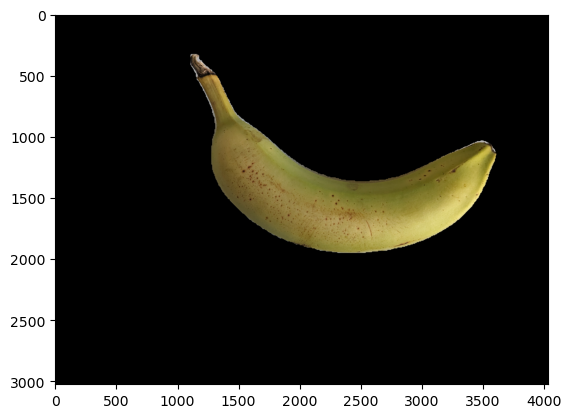

1/1 [==============================] - 0s 31ms/step
[   0.007477     0.97289   0.0091301    0.010504]
1.022660382091999
96.96969696969697 %



0: 480x640 1 banana, 2786.1ms
Speed: 4.0ms preprocess, 2786.1ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 640)


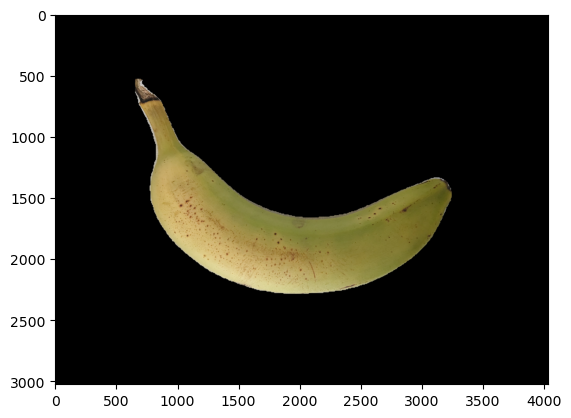

1/1 [==============================] - 0s 31ms/step
[   0.026058     0.85001       0.017     0.10693]
1.2047989219427109
100.0 %
Regression parameters: b= [    0.18275]  m= [[  0.0088912]] 0.27509961764901225


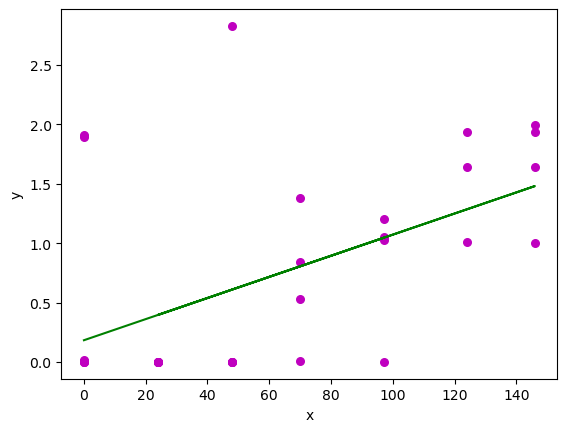

In [8]:
time_analysis(files, start_index[0], end_index[0])

In [ ]:
time_analysis(files, start_index[1], end_index[1])

In [ ]:
time_analysis(files, start_index[2], end_index[2])

In [ ]:
time_analysis(files, start_index[3], end_index[3])

In [ ]:
time_analysis(files, start_index[4], end_index[4])

In [ ]:
time_analysis(files, start_index[5], end_index[5])

In [ ]:
time_analysis(files, start_index[6], end_index[6])